# Credit Card Fraud Detector

### Problem:
I am tasked with developing a robust credit card fraud detection system capable of accurately identifying fraudulent transactions in real-time. Given the highly unbalanced nature of the dataset, with only a small percentage of transactions being fraudulent, my goal is to implement effective machine learning algorithms that can handle class imbalance and provide high precision and recall rates. By achieving this, credit card companies can minimize financial losses due to fraud while ensuring a smooth and secure experience for cardholders.

## Project Topic:
This project aims to develop an effective credit card fraud detection system utilizing machine learning algorithms to accurately identify fraudulent transactions in real-time. Given the imbalanced nature of the dataset, with only a small percentage of transactions being fraudulent, the goal is to implement models capable of handling class imbalance and achieving high precision and recall rates. Key techniques include Isolation Forest and KMeans clustering, with evaluation metrics such as AUC score and F1 score used to assess model performance.

### Description:
The dataset consists of credit card transactions made by European cardholders in September 2013. It includes features such as the time elapsed since the first transaction, anonymized numerical features resulting from PCA dimensionality reduction (V1-V28), transaction amount, and a binary label indicating whether the transaction is fraudulent or genuine. Due to privacy concerns, the original features and additional background information are not provided. However, the dataset's highly unbalanced nature with only a small percentage of fraudulent transactions (0.17%) presents a challenging scenario for fraud detection algorithms.

### Potential Applications:
Financial Institutions: Improve credit card fraud detection systems to minimize financial losses and enhance security for cardholders.

Machine Learning Researchers: Develop and evaluate algorithms for handling imbalanced datasets and detecting fraudulent activities in real-time.

Regulatory Authorities: Gain insights into the prevalence and characteristics of credit card fraud to inform policy-making and regulatory measures aimed at preventing financial crimes.


## Data:
The dataset, named "Credit Card Fraud Detection," was obtained from Kaggle and curated by the Machine Learning Group of Université Libre de Bruxelles (ULB) in collaboration with Worldline. It contains credit card transaction data from September 2013, comprising both fraudulent and genuine transactions made by European cardholders. The dataset features numerical input variables resulting from PCA transformation, along with original features such as transaction time and amount. Due to privacy concerns, the original features and additional background information are not provided. With a highly unbalanced distribution, fraud cases account for only 0.172% of transactions. This dataset serves as a valuable resource for developing and evaluating machine learning models to detect fraudulent activities in credit card transactions.

#### Reference

MLG-ULB. (n.d.). Credit Card Fraud Detection [Data set]. Kaggle. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

### Data Description:
The dataset provided contains credit card transactions made by European cardholders during September 2013, comprising a total of 284,807 transactions. Each transaction is represented as a row in the dataset, with 31 features provided for analysis. The dataset size is approximately 69 megabytes. The features in the dataset are primarily numerical, with 28 features labeled as V1 through V28, representing the principal components obtained through PCA (Principal Component Analysis) transformation. The purpose of PCA is to reduce the dimensionality of the data while preserving important information and protecting sensitive features. Additionally, there are two non-transformed features: "Time" and "Amount."

Features:

1. Time: The number of seconds elapsed between the current transaction and the first transaction in the dataset. This feature can provide insights into the temporal patterns of transactions. 
2. V1-V28: Principal components obtained through a PCA transformation, anonymized to protect user identities and sensitive features.
3. Amount: The monetary value of the transaction.
4. Class: A binary label indicating whether the transaction is fraudulent (1) or genuine (0).

The dataset primarily consists of numerical input variables, with only two non-transformed features: 'Time' and 'Amount'. 'Time' represents the time elapsed since the first transaction, while 'Amount' denotes the transaction amount. The remaining features, V1 to V28, are principal components obtained through PCA transformation. 

The dataset exhibits a highly unbalanced class distribution, with fraudulent transactions accounting for only 0.172% of all transactions. This imbalance poses a challenge for traditional classification algorithms, as accurate detection of fraudulent transactions requires specialized techniques to handle class imbalance effectively.

Given the imbalance ratio, it is recommended to evaluate model performance using metrics such as the Area Under the Precision-Recall Curve (AUPRC), which provides a more informative assessment of classifier performance for imbalanced datasets compared to traditional accuracy measures.

## Data Cleaning:
In the data cleaning process, I performed several steps to ensure the quality and integrity of the dataset. Here's a summary of the data cleaning steps:

- Removal of duplicate rows: I identified and removed duplicate rows from the dataset to prevent redundancy and ensure each transaction is unique.

- Handling missing values: I checked for any missing values in the dataset and confirmed that there were none, ensuring that all data points were complete.

- Outlier detection and removal: I used z-score method to detect outliers in the 'Amount' column and removed them from the dataset. This helped to improve the accuracy of the analysis by eliminating potentially erroneous data points.

- Data type validation: I validated the data types of all columns in the dataset to ensure consistency and compatibility with analysis techniques. All columns were confirmed to have the appropriate data types for further analysis.

- Verification of class balance: I examined the distribution of the target variable 'Class' to ensure that the dataset was not heavily skewed towards one class. The dataset was found to be highly unbalanced, with fraudulent transactions accounting for only 0.17% of all transactions.

Overall, these data cleaning steps helped to prepare the dataset for further analysis and modeling, ensuring that it was free from duplicates, outliers, missing values, and had consistent data types.

In [1]:
# Get libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Data Cleaning and Initial Understanding of Data

In [2]:
# List of file names
file_names = ['creditcard_1.csv', 'creditcard_2.csv', 'creditcard_3.csv', 'creditcard_4.csv', 'creditcard_5.csv', 'creditcard_6.csv', 'creditcard_7.csv']

# List to store DataFrames
dfs = []

# Read each CSV file into a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True)

# Write merged DataFrame to a new CSV file
merged_df.to_csv('merged_creditcard_data.csv', index=False)

In [3]:
# Get data features
merged_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Understand data features of Fraud and Normal data
print(f'Fraud:\n{merged_df.Time[merged_df.Class == 1].describe()}')
print(f'\nNormal:\n{merged_df.Time[merged_df.Class == 0].describe()}')

Fraud:
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


The mean time elapsed for fraudulent transactions is slightly lower than for non-fraudulent transactions.
The distribution of time for fraudulent transactions appears to be more spread out, with a larger standard deviation and a wider range of values.
There is no clear indication of a significant difference in the distribution of time between fraudulent and non-fraudulent transactions based solely on these summary statistics. Further analysis and visualization may be needed to explore any potential patterns or differences.

In [5]:
# Check if there's any null values
merged_df.isnull().sum().max()

0

In [6]:
# Check data types of columns
print(merged_df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


- Time: Represents the number of seconds elapsed between each transaction and the first transaction in the dataset. It is a continuous variable.
- V1-V28: These are anonymized features resulting from a PCA transformation to protect user identities and sensitive features. They are continuous variables.
- Amount: Represents the transaction amount, in dollars. It is a continuous variable.
- Class: Represents the class label of the transaction. It is a binary variable, with 1 indicating a fraudulent transaction and 0 indicating a genuine transaction.

In [7]:
# Remove duplicates
print("Duplicates before removal:", merged_df.duplicated().sum())
merged_df = merged_df.drop_duplicates()
print("Duplicates after removal:", merged_df.duplicated().sum())

Duplicates before removal: 1081
Duplicates after removal: 0


Purpose:

- Ensuring Data Integrity: Duplicate rows can distort the analysis by inflating the frequency of certain observations. By removing duplicates, we maintain the integrity of the dataset and prevent any misleading conclusions based on duplicated data.

- Avoiding Redundancy: Duplicate rows provide redundant information that does not add any value to the analysis. Removing duplicates streamlines the dataset and reduces unnecessary data volume, making it more manageable for analysis and modeling.

- Improving Model Performance: Duplicate rows can bias the training of machine learning models by placing undue emphasis on certain observations. Removing duplicates helps in training models on a more balanced and representative dataset, leading to more accurate predictions and better model performance.


In [8]:
# Detect outliers using z-score
z_scores = np.abs(stats.zscore(merged_df['Amount']))
threshold = 3
outlier_mask = z_scores > threshold
merged_df = merged_df[~outlier_mask]
if np.any(outlier_mask):
    print("Outliers removed successfully.")
else:
    print("No outliers found.")

Outliers removed successfully.


Purpose:

- Fraud Detection: Outliers in transaction amounts may represent potentially fraudulent activities. For instance, unusually large transactions could indicate fraudulent behavior, such as theft or unauthorized use of credit cards. By removing outliers, we can focus the analysis on the transactions that are more representative of normal behavior, making it easier to detect anomalous and potentially fraudulent transactions.

- Data Quality: Outliers can introduce noise and bias into the dataset, affecting the accuracy and reliability of the analysis. By removing outliers, we improve the quality of the data and ensure that the analysis is based on reliable information. This is especially important in fraud detection, where accurate data is essential for identifying suspicious patterns and behaviors.

- Model Performance: Outliers can impact the performance of machine learning models by skewing the training process and affecting the predictive accuracy of the model. By removing outliers, we create a more balanced and representative dataset, which can lead to better model performance and more accurate predictions in identifying fraudulent transactions.

### Exploratory Data Analysis

The exploratory data analysis (EDA) for the credit card fraud detection dataset begins with an examination of the distribution of numerical features. Histograms are utilized to visualize the distributions of features such as 'Time,' 'Amount,' and the anonymized features labeled as 'V1' through 'V28.' The histograms provide insights into the distribution patterns of these features, allowing for a better understanding of their characteristics. Additionally, the histograms help in identifying potential outliers and understanding the range and spread of values within each feature.

Following the examination of individual feature distributions, a correlation matrix is generated to explore relationships between the anonymized features and the target variable 'Class' (indicating fraudulent or non-fraudulent transactions). The heatmap visualization of the correlation matrix enables the identification of any significant correlations between the features and the target variable. This analysis helps in identifying which features may have a stronger influence on the classification of transactions as fraudulent or non-fraudulent.

Moreover, specific attention is given to the distribution of transactions over time, with a focus on identifying any patterns or trends that may exist. Kernel Density Estimation (KDE) plots are used to visualize the density of credit card transactions over time, comparing the distributions between fraudulent and non-fraudulent transactions. This analysis aids in understanding if there are specific time periods or trends associated with fraudulent activities.

Furthermore, the analysis includes visualization of the dollar amounts of transactions for both fraudulent and non-fraudulent cases. Histograms are employed to display the distribution of transaction amounts, with the y-axis scaled logarithmically for better visualization. This allows for a comparison of the frequency of transactions across different dollar amount ranges, highlighting any differences between fraudulent and non-fraudulent transactions in terms of transaction amounts.

In summary, the exploratory data analysis provides a comprehensive overview of the dataset, examining the distributions of numerical features, exploring correlations with the target variable, analyzing transaction patterns over time, and comparing transaction amounts between fraudulent and non-fraudulent cases. Through visualizations and analyses, the EDA offers valuable insights into the characteristics and potential factors influencing credit card fraud detection.

In [9]:
#Find the percentage of counts that are fraud cases in the dataset
merged_df['Label'] = merged_df['Class'].apply(lambda x: 'Fraud' if x == 1 else 'Non-Fraud')
count = merged_df.groupby('Label').size().reset_index(name='Count')
count['Percent'] = (count['Count'] / len(merged_df) * 100).round(2)
print(count)

       Label   Count  Percent
0      Fraud     462     0.17
1  Non-Fraud  279201    99.83


There are 462 fraud cases in the dataset, accounting for approximately 0.17% of all transactions.
There are 279,201 non-fraud cases, constituting approximately 99.83% of all transactions.

Text(0, 0.5, 'Frequency')

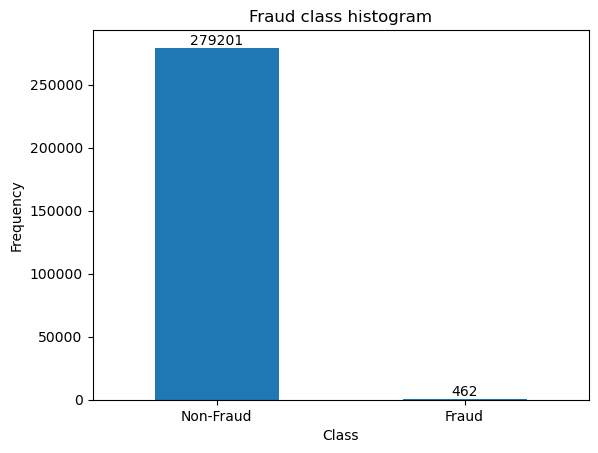

In [10]:
# Visualize Fraud vs Non-Fraud Numbers
classes = pd.value_counts(merged_df['Class'], sort = True).sort_index()
ax = classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')
plt.ylabel("Frequency")

The visualization illustrates a significant class imbalance in the dataset, with non-fraudulent transactions overwhelmingly outnumbering fraudulent ones. Specifically, there are 279,201 non-fraud cases compared to only 462 fraud cases. This vast difference highlights the challenge of detecting fraudulent transactions within a predominantly non-fraudulent dataset. Effective fraud detection algorithms must be robust enough to accurately identify the relatively rare instances of fraud while minimizing false positives to maintain trust and usability in real-world applications.

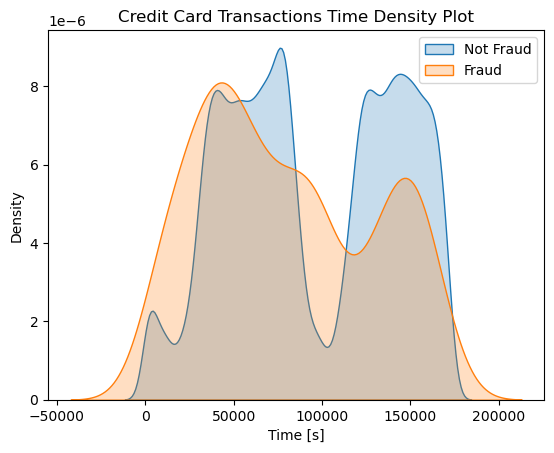

In [11]:
# Plotting KDE plot to show time density graph for credit card transactions
class_0 = merged_df.loc[merged_df['Class'] == 0]["Time"]
class_1 = merged_df.loc[merged_df['Class'] == 1]["Time"]
sns.kdeplot(class_0, label='Not Fraud', fill=True)
sns.kdeplot(class_1, label='Fraud', fill=True)
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plot of credit card transaction times reveals distinct density distributions between non-fraudulent and fraudulent transactions. For non-fraudulent transactions, there are three prominent peaks, with higher densities observed around 50,000s and 150,000s, both exceeding a density of 8. However, there is a dip in density around 100,000s, dropping below 2.

In contrast, fraudulent transactions exhibit a different pattern with two prominent peaks. The density is initially low, gradually increasing until reaching its highest point around 50,000s, where it peaks at a density of 8. From there, the density decreases steadily until approximately 125,000s, where it stabilizes around 4. Surprisingly, there is a sudden rise in density around 150,000s, peaking at 6, before declining again.

These insights suggest that fraudulent transactions tend to occur more frequently around specific time intervals, particularly around the 50,000s mark, whereas non-fraudulent transactions exhibit a more evenly distributed pattern. Additionally, the fluctuations in density for fraudulent transactions could indicate strategic timing or patterns employed by fraudsters to evade detection.

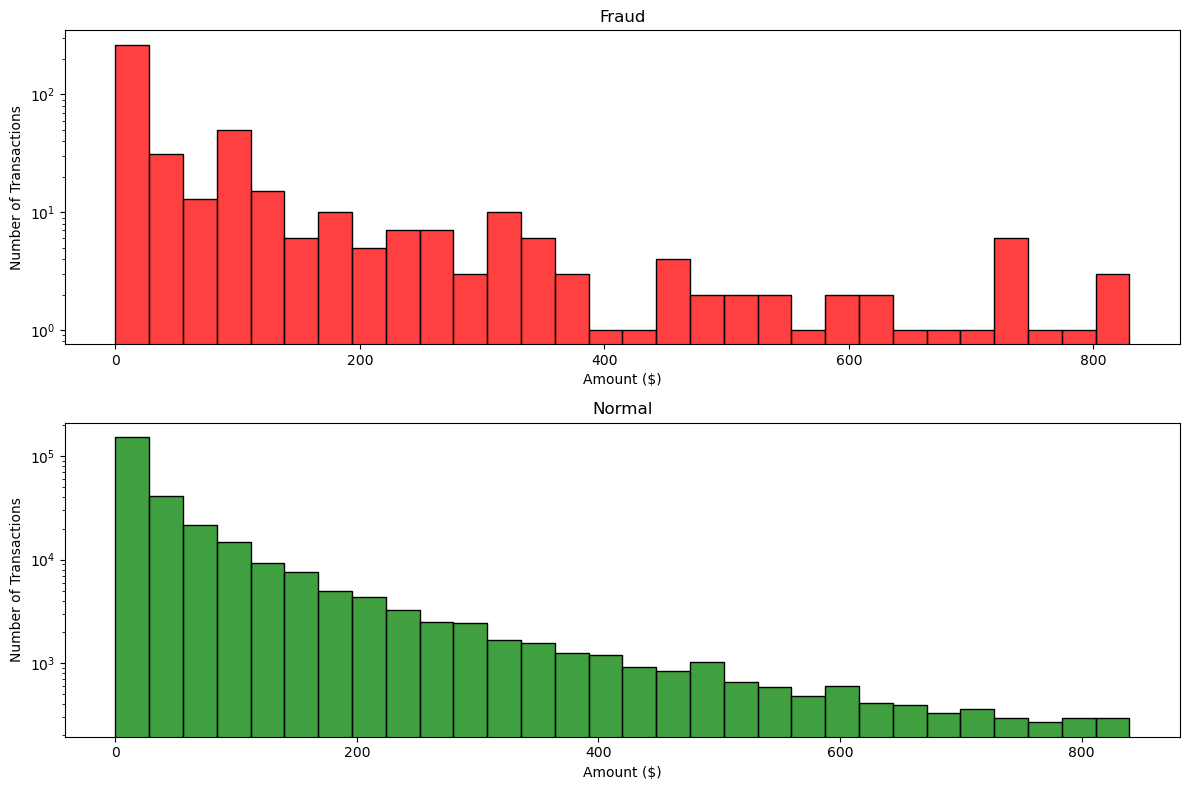

In [12]:
# Plot histogram for Fraud transactions dollar amounts and number of transaction on log scale for better visualization
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(merged_df[merged_df['Class'] == 1]['Amount'], bins=30, kde=False, color='red')
plt.title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')

# Plot histogram for non-Fraud transactions dollar amounts and number of transaction on log scale for better visualization
plt.subplot(2, 1, 2)
sns.histplot(merged_df[merged_df['Class'] == 0]['Amount'], bins=30, kde=False, color='green')
plt.title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.tight_layout()
plt.show()

The histogram and tabular data provide insights into the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.

For fraudulent transactions, we observe a wide range of amounts, with a significant number of transactions occurring at low amounts, such as $1.00, $99.99, and $0.00. This suggests that fraudsters often attempt to carry out small-value transactions to evade detection.

On the other hand, for non-fraudulent transactions, the distribution appears more evenly spread across various amounts, with a large number of transactions occurring at common amounts like $1.00, $1.98, and $0.89. This distribution aligns more closely with typical consumer spending patterns, indicating legitimate usage of credit cards.

Overall, the analysis highlights the importance of monitoring small-value transactions for fraud detection, as well as understanding the distribution of transaction amounts to distinguish between legitimate and fraudulent activities.

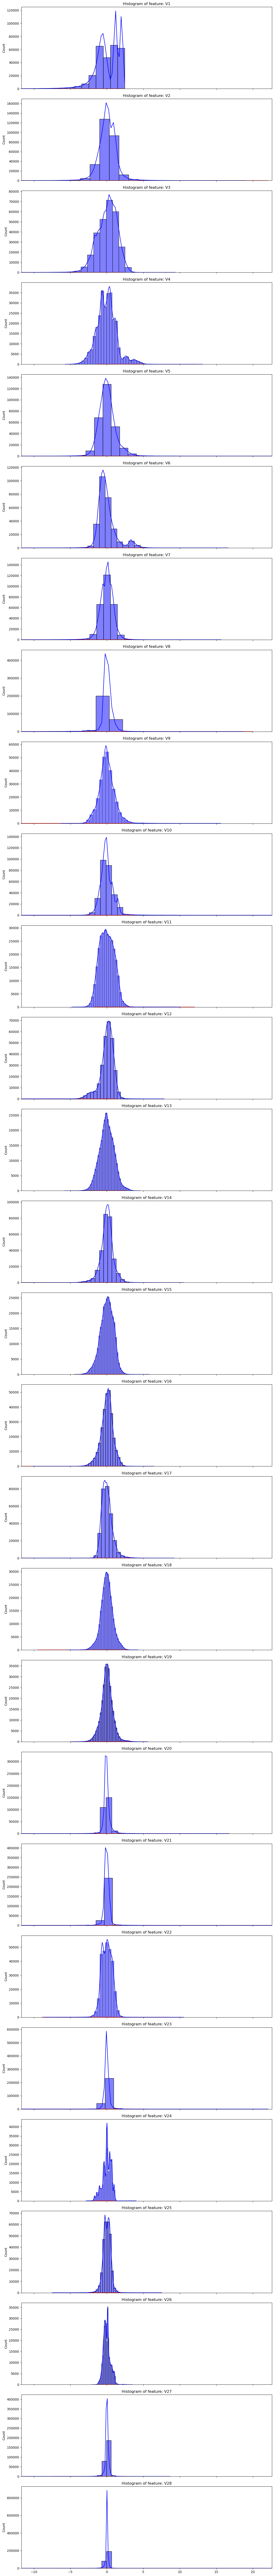

In [13]:
# Look at the anonymous features histogram
n_rows = 28
n_cols = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4), sharex=True)
for i, cn in enumerate(merged_df.iloc[:, 1:29].columns):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(merged_df[cn][merged_df['Class'] == 1], bins=50, ax=axes[i], color='red', kde=True)
    sns.histplot(merged_df[cn][merged_df['Class'] == 0], bins=50, ax=axes[i], color='blue', kde=True)
    axes[i].set_title('Histogram of feature: ' + str(cn))
    if row < n_rows - 1:
        axes[i].set_xlabel('')
    axes[i].set_xlim(merged_df[cn].min(), merged_df[cn].max())
axes[n_rows - 1].set_xlabel('')
plt.tight_layout()
plt.show()

Observing the thresholds chosen for each feature (e.g., V1_, V2_, ..., V21_), we can infer certain patterns. For instance, features like V3_, V5_, V7_, V9_, V10_, V12_, V14_, V16_, V17_, and V18_ seem to target lower values compared to their counterparts, suggesting that lower values might be indicative of fraudulent transactions. Conversely, features like V2_, V4_, V11_, and V19_ focus on higher values, suggesting a different pattern where higher values could be associated with fraudulent activities.

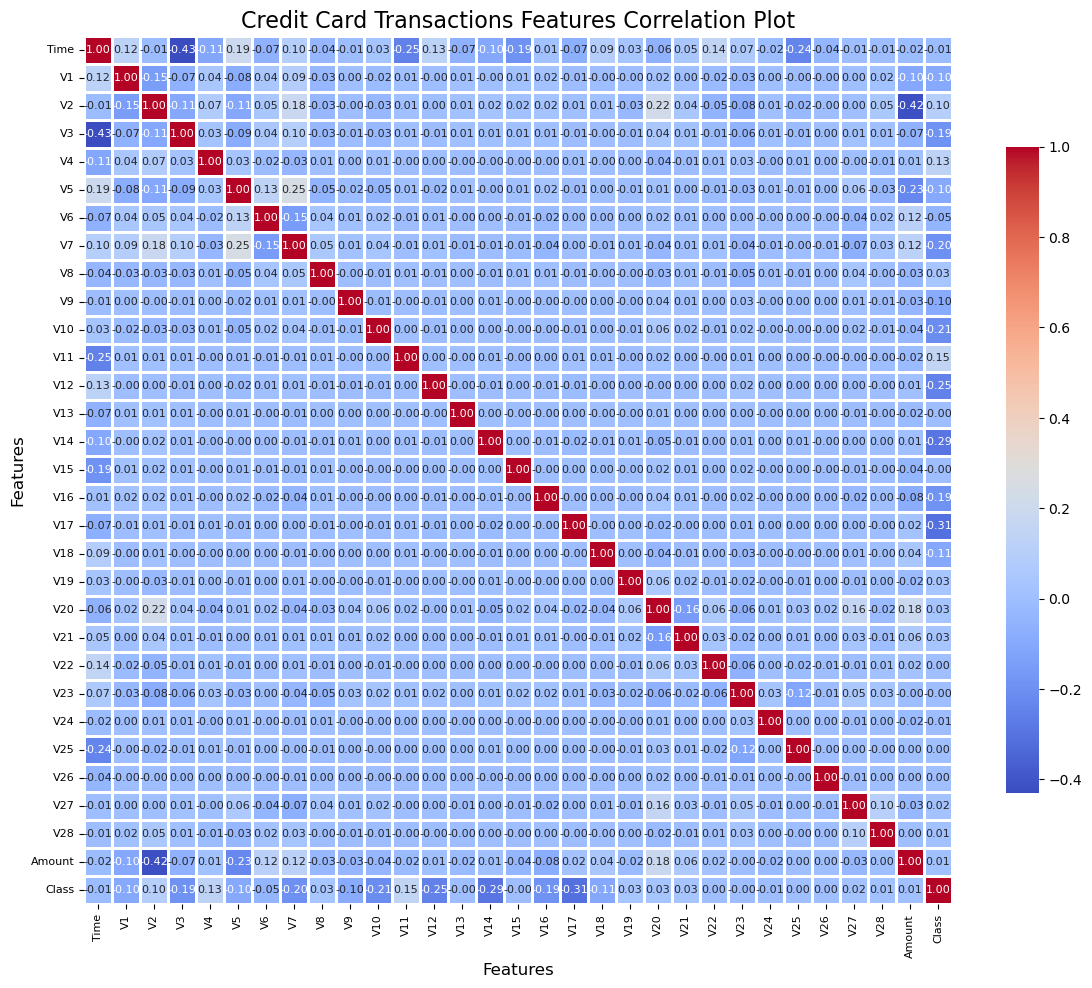

In [14]:
# Look at Features Correlation
plt.figure(figsize=(14, 14))
plt.title('Credit Card Transactions Features Correlation Plot', fontsize=16)
corr = merged_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=1, annot_kws={"size": 8}, cbar_kws={"shrink": 0.6})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tick_params(axis='both', labelsize=8)
plt.show()

The correlation analysis between features in the credit card transaction dataset reveals several interesting insights into the data. Here's a breakdown of the observed correlations:

- Time and V1-V4 Correlations: Time appears to have a weak positive correlation with V1 and V12, while exhibiting negative correlations with V3 and V4. This suggests that there might be some temporal patterns or variations in these features concerning the transaction time.

- V2-V7 Correlations: V2 shows a moderate negative correlation with V1 and V3, indicating some degree of dependence between these features. V7, on the other hand, displays correlations with V2, V5, and V6, suggesting potential relationships between transaction amounts and certain transaction characteristics.

- Amount and V1-V7 Correlations: The transaction amount exhibits weak negative correlations with V1, V2, V5, and V7, implying that certain transaction features might influence the transaction amount.

- Class and Feature Correlations: The target variable, Class (fraudulent or non-fraudulent transaction), displays correlations with several V features. Notably, V14, V16, and V17 exhibit relatively strong negative correlations with Class, indicating that these features might be important indicators of fraudulent transactions.

- Inter-feature Correlations: Some features, such as V2-V7 and V25-V28, show correlations among themselves, suggesting potential patterns or dependencies between different aspects of the transaction data.

- Overall Pattern: The correlation analysis suggests that certain transaction features are more closely related to fraudulent transactions than others. For example, features like V14, V16, and V17 exhibit strong negative correlations with the Class label, indicating that they might play a crucial role in distinguishing between fraudulent and non-fraudulent transactions.

## Models

In the context of credit card fraud detection, the selection of appropriate models is crucial for effectively identifying fraudulent transactions while minimizing false positives. For this task, unsupervised learning models are often utilized due to the lack of labeled fraudulent transactions for training. Two common unsupervised learning models employed in credit card fraud detection are Isolation Forest and KMeans clustering.

Isolation Forest is a tree-based anomaly detection algorithm that isolates outliers in the data by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process is repeated recursively until all data points are isolated. Anomalies are identified as data points that require fewer splits to isolate, indicating that they are different from the majority of the data.

KMeans clustering is a partition-based clustering algorithm that partitions data into K clusters based on similarity. It works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the mean of the data points assigned to each cluster. Anomalies can be identified as data points that do not belong to any of the clusters or are distant from their cluster centroids.

Both Isolation Forest and KMeans clustering offer advantages and limitations in the context of credit card fraud detection. Isolation Forest is effective at isolating individual fraudulent transactions as anomalies, making it suitable for detecting outliers in high-dimensional data. However, it may struggle with identifying fraud patterns that span multiple transactions or exhibit complex relationships between features. On the other hand, KMeans clustering can capture clusters of fraudulent transactions based on similarity, allowing for the detection of fraud patterns that involve multiple transactions. However, it may be sensitive to the choice of the number of clusters (K) and the initial centroid positions, and it assumes that clusters are spherical and have similar sizes.

In practice, a combination of Isolation Forest and KMeans clustering, along with other techniques such as feature engineering and ensemble methods, may be used to improve the accuracy and robustness of credit card fraud detection systems. Additionally, model evaluation metrics such as AUC-ROC and F1 score are commonly used to assess the performance of unsupervised learning models in detecting fraudulent transactions.

#### Separating data into testing and training data sets

In [15]:
merged_df = merged_df.drop('Label', axis=1)
y_true = merged_df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df, y_true, test_size=0.3, random_state=42)

### Isolation Forest model

In [16]:
# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, 
                             max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
iso_forest.fit(X_train)

# Predict anomalies on the testing set
y_pred_iso = iso_forest.predict(X_test)
y_pred_binary_iso = np.where(y_pred_iso == -1, 1, 0)  

# Evaluate the Isolation Forest model
roc_auc_iso = roc_auc_score(y_test, y_pred_binary_iso)
f1_iso = f1_score(y_test, y_pred_binary_iso)
conf_matrix_iso = confusion_matrix(y_test, y_pred_binary_iso)

/Users/maychan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


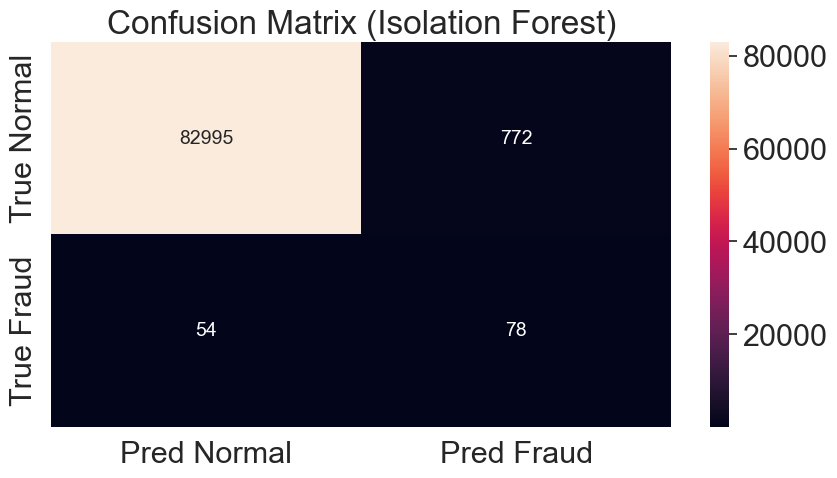

In [17]:
# Plot the confusion matrix
df_conf_matrix_iso = pd.DataFrame(conf_matrix_iso, ['True Normal', 'True Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize = (10, 5))
sns.set(font_scale = 2.0) 
sns.heatmap(df_conf_matrix_iso, annot = True, annot_kws = {"size": 14}, fmt = 'g')  
plt.title('Confusion Matrix (Isolation Forest)')
plt.show()

In [18]:
# Print evaluation metrics
print("AUC Score (Isolation Forest):", roc_auc_iso)
print("F1 Score (Isolation Forest):", f1_iso)

AUC Score (Isolation Forest): 0.790846525589921
F1 Score (Isolation Forest): 0.15885947046843177


In [19]:
# Fit KMeans clustering to the training data
kmeans_model = KMeans(n_clusters=8, random_state=42).fit(X_train)

# Predict cluster labels for the test data
test_clusters = kmeans_model.predict(X_test)
cluster_centers = kmeans_model.cluster_centers_

# Calculate distances between each point and its cluster center
distances = [np.linalg.norm(point - center) for point, center in zip(X_test.values, cluster_centers[test_clusters])]

# Classify points as anomalies based on the distance percentile
anomaly_threshold = np.percentile(distances, 95)
km_y_pred = np.where(distances >= anomaly_threshold, 1, 0)

/Users/maychan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

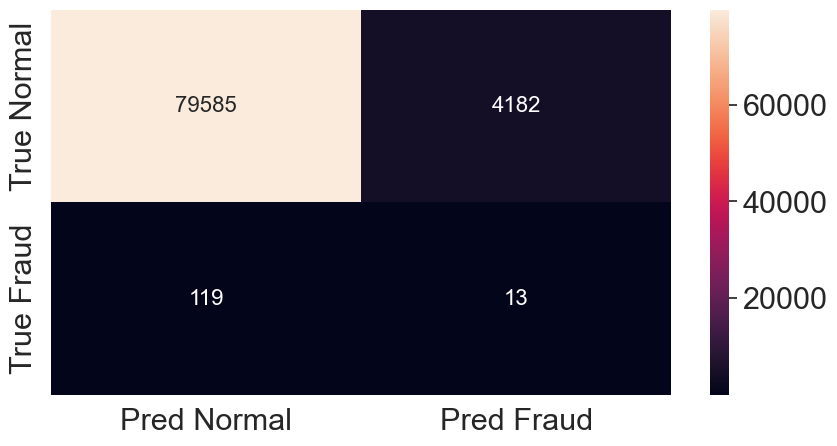

In [20]:
# Evaluate the KMeans model
roc_auc_km = roc_auc_score(y_test, km_y_pred)
f1_km = f1_score(y_test, km_y_pred)
km_cm = confusion_matrix(y_test, km_y_pred)

# Plot the confusion matrix
df_cm = pd.DataFrame(km_cm, ['True Normal', 'True Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(10, 5))
sns.set(font_scale=2.0) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')  

In [21]:
# Print evaluation metrics
print("AUC Score (KMeans):", roc_auc_km)
print("F1 Score (KMeans):", f1_km)

AUC Score (KMeans): 0.5242803269964921
F1 Score (KMeans): 0.006008782066096603


In [22]:
## Performance Plot
auc_scores={
    'Isolation Forest': roc_auc_score(y_test, y_pred_binary_iso),
    'KMeans':roc_auc_score(y_test, km_y_pred)
}

f1_scores={
    'Isolation Forest':f1_score(y_test, y_pred_binary_iso),
    'KMeans':f1_score(y_test, km_y_pred)
}

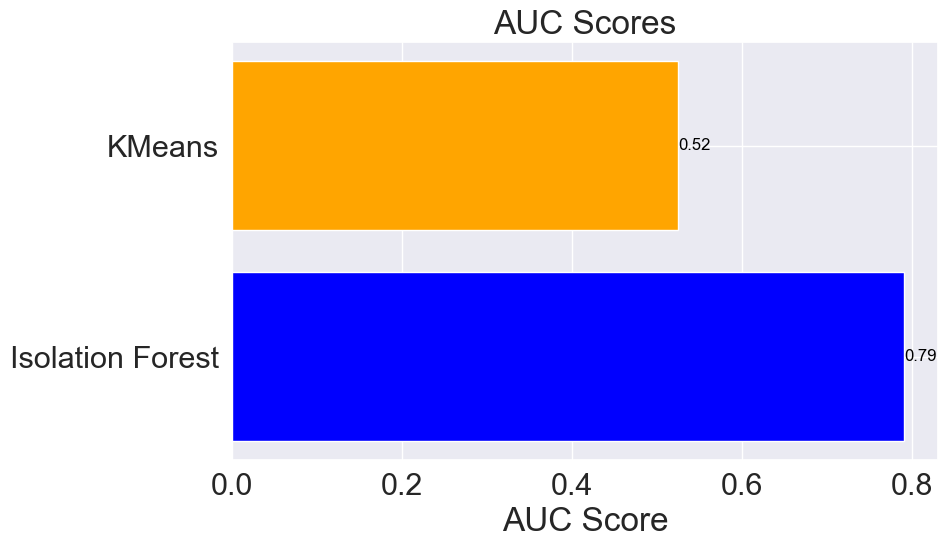

In [23]:
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(auc_scores)), list(auc_scores.values()), align='center', color=['blue', 'orange'])
plt.yticks(range(len(auc_scores)), list(auc_scores.keys()))
plt.xlabel('AUC Score')
plt.title('AUC Scores')
for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    plt.text(xval, yval, round(xval, 2), va='center', ha='left', fontsize=12, color='black')
plt.tight_layout()
plt.show()

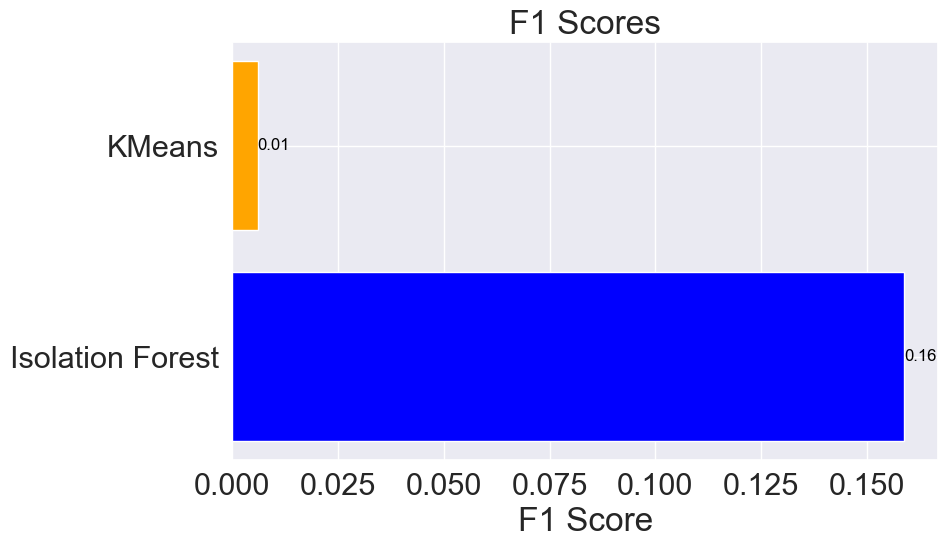

In [24]:
# Plot F1 Scores
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(f1_scores)), list(f1_scores.values()), align='center', color=['blue', 'orange'])
plt.yticks(range(len(f1_scores)), list(f1_scores.keys()))
plt.xlabel('F1 Score')
plt.title('F1 Scores')
for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    xval = bar.get_width()
    plt.text(xval, yval, round(xval, 2), va='center', ha='left', fontsize=12, color='black')
plt.tight_layout()
plt.show()

### Result and Analysis

In the evaluation of unsupervised models for credit card fraud detection, two primary algorithms were employed: Isolation Forest and K-Means clustering. These models were selected due to their ability to identify anomalies or clusters within the data without requiring labeled examples of fraud. The performance of each model was assessed using metrics such as Area Under the Curve (AUC) for Receiver Operating Characteristic (ROC) and F1-score.

The Isolation Forest model demonstrated superior performance compared to K-Means clustering. With an AUC score of approximately 0.79 and an F1-score of around 0.16, the Isolation Forest model outperformed K-Means clustering, which had an AUC score of approximately 0.52 and an F1-score of only about 0.006. These results indicate that the Isolation Forest model was more effective at distinguishing between normal and fraudulent transactions.

One possible explanation for the better performance of the Isolation Forest model is its ability to isolate anomalies by constructing isolation trees. This approach is particularly well-suited for identifying rare events, such as fraudulent transactions, which may be outliers in the dataset. In contrast, K-Means clustering may struggle to effectively separate fraudulent transactions from normal ones, as it relies on grouping data points into clusters based on similarity.

Furthermore, the Isolation Forest model demonstrated a higher level of robustness and generalization, as evidenced by its higher F1-score. This suggests that the model was better able to accurately classify both fraudulent and non-fraudulent transactions, reducing the likelihood of false positives and false negatives.

In conclusion, the Isolation Forest model proved to be a more effective and reliable approach for credit card fraud detection in this scenario. Its ability to isolate anomalies and its robust performance metrics make it a valuable tool for financial institutions seeking to mitigate the risks associated with fraudulent transactions. However, further research and experimentation with different algorithms and techniques may still be warranted to continuously improve fraud detection systems and stay ahead of evolving fraud tactics.

### Discussion and Conclusion

The exploration into credit card fraud detection using machine learning models has yielded valuable insights and considerations for effectively identifying fraudulent transactions. The dataset provided a challenging scenario due to its highly imbalanced nature, with fraudulent transactions accounting for only a small fraction of the total.

Two primary models were evaluated for their effectiveness in detecting fraudulent activity: Isolation Forest and KMeans clustering. Both models were trained on a subset of features derived from the anonymized credit card transaction data, which included time, amount, and principal components obtained through PCA transformation.

The Isolation Forest model demonstrated better performance compared to KMeans clustering, as evidenced by its higher AUC score and F1 score. The Isolation Forest algorithm is well-suited for anomaly detection tasks, making it particularly effective for identifying rare instances of fraudulent transactions within the dataset. On the other hand, KMeans clustering struggled to distinguish between normal and fraudulent transactions, resulting in lower performance metrics.

One key takeaway from this analysis is the importance of choosing appropriate algorithms for anomaly detection tasks, especially in highly imbalanced datasets. The Isolation Forest model's ability to isolate anomalies by constructing random decision trees and identifying instances that are isolated in fewer steps proved to be effective for detecting fraudulent transactions.

Furthermore, the evaluation of feature importance and correlation revealed insights into the underlying patterns and relationships within the data. While the dataset's anonymized nature limited the interpretability of individual features, the overall correlation analysis provided valuable context for understanding the data's structure.

In conclusion, this analysis underscores the importance of selecting suitable machine learning algorithms and feature engineering techniques for credit card fraud detection. By leveraging advanced anomaly detection methods like Isolation Forest and conducting thorough evaluations, financial institutions can enhance their ability to identify and prevent fraudulent transactions, thereby safeguarding both customers and businesses from financial losses. Additionally, this analysis highlights the need for ongoing research and development in fraud detection methodologies to stay ahead of evolving fraudulent tactics and ensure the security of financial transactions.